## Contents
- 결합 탐색
- 조건 탐색
- 변수 탐색
- 인코딩
- 시각적 탐색

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
# con1 = pd.concat([df1,df2],axis=0)
con1 = pd.concat([df1,df2],axis=0,ignore_index=True)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con2 = pd.concat([df1,df2],axis=1)
con2.head()

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge() 를 이용한 결합
# pd.merge(df1,df2,on='ind',how='outer')
pd.merge(df1,df2,on='ind') # drfault는 inner

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
df1 = df1.drop('ind',axis=1)
df2 = df2.drop('ind',axis=1)
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합(default는 교집합)
# df1.join(df2,lsuffix='_1',rsuffix='_2')
df1.join(df2,lsuffix='_1',rsuffix='_2',how='inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2,lsuffix='_1',rsuffix='_2',how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]

In [ ]:
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2')

,a,b,c,d_1,e_1,d_2,e_2,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [ ]:
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2',how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
ind,,,,,,,,,
1,1.0,2.0,3.0,4.0,5.0,11,12,13,14
2,6.0,7.0,8.0,9.0,10.0,15,16,17,18
3,11.0,12.0,13.0,14.0,15.0,19,20,21,22
4,16.0,17.0,18.0,19.0,20.0,23,24,25,26
5,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2',on='ind',how='outer')

,ind,a,b,c,d_1,e_1,d_2,e_2,h,i
1.0,1,1.0,2.0,3.0,4.0,5.0,11,12,13,14
2.0,2,6.0,7.0,8.0,9.0,10.0,15,16,17,18
3.0,3,11.0,12.0,13.0,14.0,15.0,19,20,21,22
4.0,4,16.0,17.0,18.0,19.0,20.0,23,24,25,26
NaN,5,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임 만들기
filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine='openpyxl',index_col='id')
df2 = pd.read_excel(filepath2, engine='openpyxl',index_col='id')

print(df1,'\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how='left'옵션이 기본 적용
df3 = df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
df4 = df1.join(df2, how='right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
# 데이터프레임 결합(join) - 교집합
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
df4 = df1.join(df2, how='inner')
print(df4)

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [25]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [27]:
# 두 데이터프레임 결합 (내부 조인)
merged_df = pd.merge(customers, purchases, on='customer_id', how='inner')
print(merged_df, '\n')

# 고객별 총 지출 계산
total_spent = merged_df.groupby('name')['amount'].sum().reset_index()

# 결과 출력
print(total_spent)

   customer_id     name  purchase_id  amount
0            1    Alice          101     250
1            1    Alice          103     200
2            2      Bob          102     150
3            2      Bob          105     350
4            3  Charlie          104     300 

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.

In [28]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [30]:
# 두 데이터프레임 결합 (내부 조인)
merged_df = pd.merge(grades, subjects, on='subject_id', how='inner')
print(merged_df,'\n')

# 과목별 평균 성적 계산
average_grades = merged_df.groupby('subject_name')['grade'].mean().reset_index()

# 결과 출력
print(average_grades)

   student_id  subject_id  grade subject_name
0           1         101     85         Math
1           2         101     90         Math
2           3         101     80         Math
3           3         102     78      Science
4           4         102     88      Science
5           1         103     92      History
6           2         103     95      History
7           4         103     85      History 

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


In [ ]:
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


Q. df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여
데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)

In [ ]:
df4.drop('name', axis=1, inplace=True)

df5 = df4[(df4['eps'] < 3000) | (df4['stock_name'] == '이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
data = np.arange(20).reshape(4,5)

df = pd.DataFrame(data, columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1,'\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx = df1[df1.a > 10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15

df[cond1 & cond2 & cond3]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
cond1 = df.a > 5
cond2 = df.b == 16
cond3 = df.e > 5

df[cond1 | cond2 | cond3]

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
# df[cond1]
df[cond1][['a','b']]

,a,b
2,10,11
3,15,16


Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [32]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [33]:
# 조건을 만족하는 고객 찾기 (age >= 30 and spending >= 500)
con1 = customers['age'] >= 30
con2 = customers['spending'] >= 500
filtered_customers = customers[con1 & con2]

# 결과 출력
print(filtered_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [5]:
import pandas as pd

students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [36]:
# 조건을 만족하는 학생 찾기 (80 <= math_score <= 90)
c1 = students['math_score'] >= 80
c2 = students['math_score'] <= 90
filtered_students = students[c1 & c2]

# 결과 출력
print(filtered_students)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼이름 변경
tdf.rename(columns={'sex':'gender','fare':'ticket'},inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값 변경(임시 저장)
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 값 변경(원본 반영)
tdf1 = tdf.copy()
tdf1.gender.replace({'female':1, 'male':0},inplace=True)
tdf1.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis='columns',inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 칼럼 소문자 변경
tdf.rename(str.lower, axis='columns',inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.copy()

In [ ]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# 컬럼 순서 변경
columns_customed = ['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
# Dtype 변경
tdf1 = tdf1.astype({'age':'int','ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# age 컬럼의 값 구성 체크
age_counts_sorted = tdf.age.value_counts()
age_counts_sorted.sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 고유 구성 요소
len(tdf.age.unique())
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
def get_category(age):
'Baby','Child','Teenager','Young Adult','Adult','Elderly

In [ ]:
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf.head()

In [ ]:
# age 컬럼 범주화
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf[['age','age_cat']].head()

,age,age_cat
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf[['age','cat']].head()

,age,cat
0,22.0,Teenager
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [37]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3 (1).csv


In [38]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [39]:
# 생존자와 비생존자 수 계산
survival_counts = df.survived.value_counts()

# 결과 출력
print(survival_counts)

survived
0    809
1    500
Name: count, dtype: int64


Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [40]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 객실 등급별 평균 운임 계산
average_fare_by_class = df.groupby('pclass')['fare'].mean()

# 결과 출력
print(average_fare_by_class)

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64


Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [43]:
import numpy as np

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()
print(correlation_matrix,'\n')

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

            pclass  survived  sex       age     sibsp     parch      fare  \
pclass    1.000000 -0.312469  NaN -0.408106  0.060832  0.018322 -0.558629   
survived -0.312469  1.000000  NaN -0.055512 -0.027825  0.082660  0.244265   
sex            NaN       NaN  NaN       NaN       NaN       NaN       NaN   
age      -0.408106 -0.055512  NaN  1.000000 -0.243699 -0.150917  0.178740   
sibsp     0.060832 -0.027825  NaN -0.243699  1.000000  0.373587  0.160238   
parch     0.018322  0.082660  NaN -0.150917  0.373587  1.000000  0.221539   
fare     -0.558629  0.244265  NaN  0.178740  0.160238  0.221539  1.000000   
body     -0.034642       NaN  NaN  0.058809 -0.099961  0.051099 -0.043110   

              body  
pclass   -0.034642  
survived       NaN  
sex            NaN  
age       0.058809  
sibsp    -0.099961  
parch     0.051099  
fare     -0.043110  
body      1.000000   

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass    

Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

In [15]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [44]:
# 가족 크기 계산 (형제자매/배우자 수 + 부모/자녀 수)
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size', 'survived']].corr().iloc[0, 1]

survival_family_correlation

0.02687643412533259

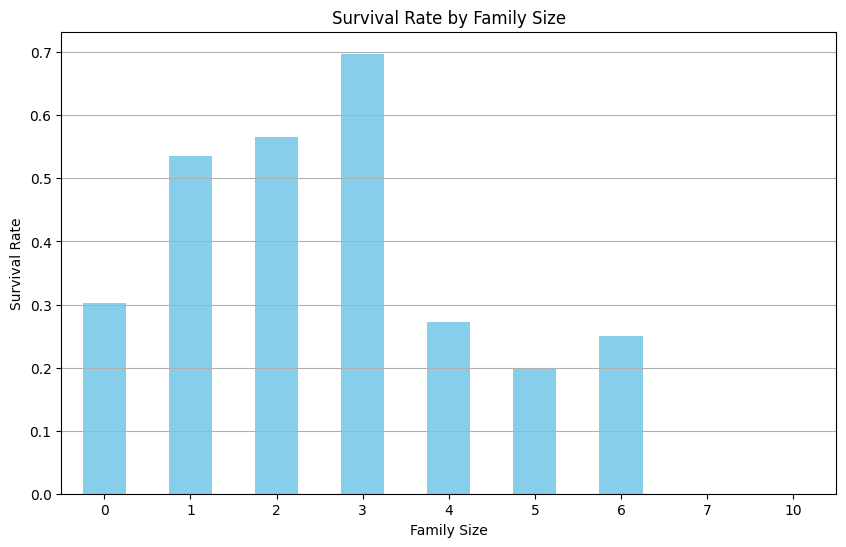

In [17]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [45]:
df[['pclass','fare']].head()

,pclass,fare
0,1,211.3375
1,1,151.5500
2,1,151.5500
3,1,151.5500
4,1,151.5500


In [47]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass,'\n')

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass','fare','mean_fare_by_pclass']].head()


{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [48]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0, 1]

mean_fare_survival_correlation

0.2918753351352463

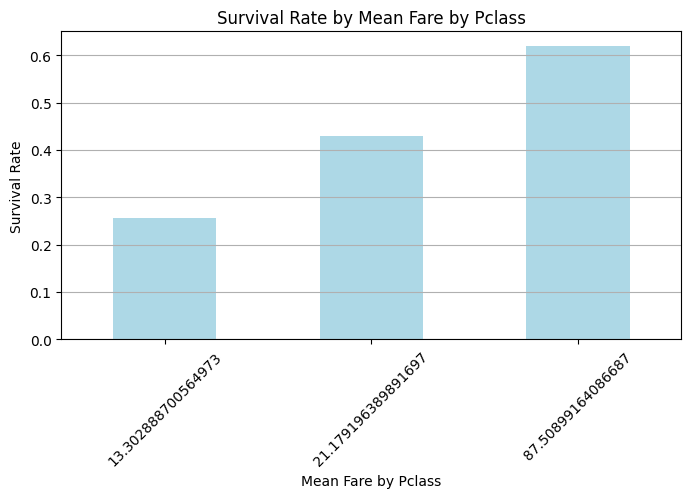

In [51]:
# 생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 4))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Task. RandomForestClassifier를 사용하여 생존 예측 모델을 생성하고, 어떤 변수가 생존 예측에 가장 중요한지 파악하여 출력하세요.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/titanic3.csv'
df = pd.read_csv(file_path)

# 필요한 열 선택 및 전처리
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[features + ['survived']]

# 결측값 처리
# 수치형 데이터에 대한 결측값 처리
num_imputer = SimpleImputer(strategy='mean')
df[['age', 'fare']] = num_imputer.fit_transform(df[['age', 'fare']])

# 범주형 데이터에 대한 결측값 처리
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])

# 결측값이 남아있는지 확인
print(df.isnull().sum())


# 독립 변수와 종속 변수 분리
X = df[features]
y = df['survived']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 계산
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})

# 중요도 순으로 정렬
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 결과 출력
print("Feature importances:")
print(feature_importance)


pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64
Feature importances:
    Feature  Importance
5      fare    0.270670
2       age    0.260030
1       sex    0.259853
0    pclass    0.083116
3     sibsp    0.049834
4     parch    0.042623
6  embarked    0.033873


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 예제 데이터
data = {'color': ['red', 'blue', 'green', 'blue', 'red']}
df = pd.DataFrame(data)
print(df,'\n')
# Label Encoding 적용
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])

print(df)


   color
0    red
1   blue
2  green
3   blue
4    red 

   color  color_encoded
0    red              2
1   blue              0
2  green              1
3   blue              0
4    red              2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터
data = {'color': ['red', 'blue', 'green', 'blue', 'red']}
df = pd.DataFrame(data)
print(df,'\n')
# One-Hot Encoding 적용
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(df[['color']])

# 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['color']))

# 원래 데이터프레임에 추가
df = pd.concat([df, encoded_df], axis=1)

print(df)


   color
0    red
1   blue
2  green
3   blue
4    red 

   color  color_blue  color_green  color_red
0    red         0.0          0.0        1.0
1   blue         1.0          0.0        0.0
2  green         0.0          1.0        0.0
3   blue         1.0          0.0        0.0
4    red         0.0          0.0        1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cat      891 non-null    object  
 16  cat          714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(6)
memory usage: 88

In [ ]:
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Teenager
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult,Young Adult


In [ ]:
tdf.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender','age']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Teenager
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult,Young Adult


In [ ]:
tdf2 = tdf[['gender','class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


In [ ]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,NaN,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,NaN,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

items = list(df1.sex)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1,1)
# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
원-핫 인코딩 데이터 차원
(891, 2)


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [ ]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts1 = ts.cumsum()
df = pd.DataFrame({'value':ts,'cum':ts1})
df.head()

,value,cum
2020-01-01,1.233777,1.233777
2020-01-02,0.293179,1.526956
2020-01-03,-2.860447,-1.333492
2020-01-04,0.009787,-1.323705
2020-01-05,0.757634,-0.566070


In [ ]:
num = np.random.randn(1000)
mean_val = num.mean()
std_dev = num.std()
print(mean_val, std_dev)

-0.03555644683698737 0.9957372879706937


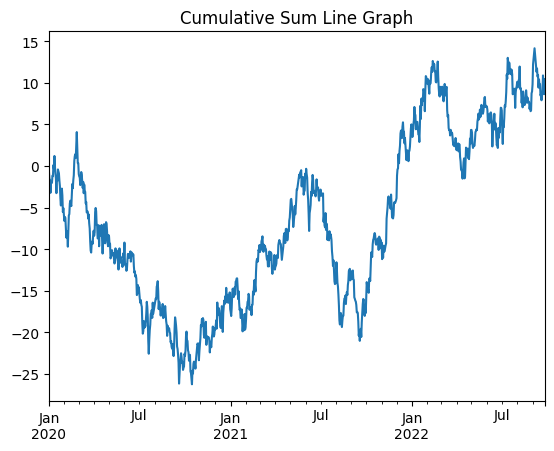

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()


              A         B
one    0.663057  0.036082
two    0.205780  0.619156
three  0.977460  0.811754
four   0.288584  0.997101
five   0.778290  0.468424 



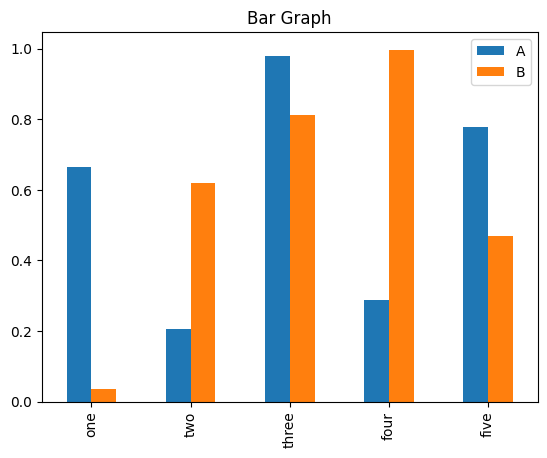

In [ ]:
df = pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.rand(5)
}, index=['one', 'two', 'three', 'four', 'five'])
print(df,'\n')
# 막대 그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()

            A         B
0    0.159347  0.237748
1   -0.294337  0.798563
2    0.729561  1.114759
3   -1.764766 -0.471810
4   -1.841304 -0.333501
..        ...       ...
995 -0.131078 -0.059523
996 -0.045440 -0.031616
997  2.719674  0.317351
998  1.389033 -1.068554
999  1.786756 -0.382391

[1000 rows x 2 columns] 



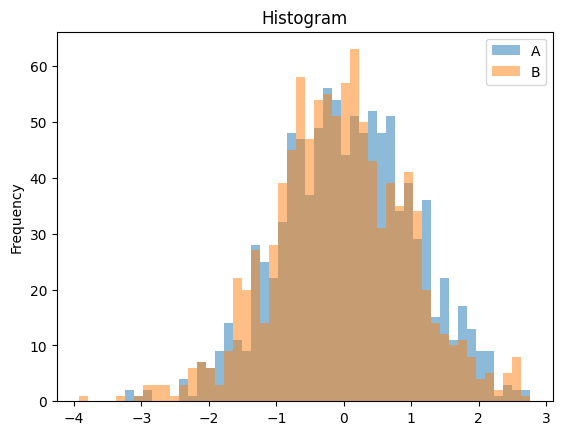

In [ ]:
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})
print(df,'\n')
# 히스토그램
df.plot.hist(alpha=0.5, bins=50)
plt.title('Histogram')
plt.show()

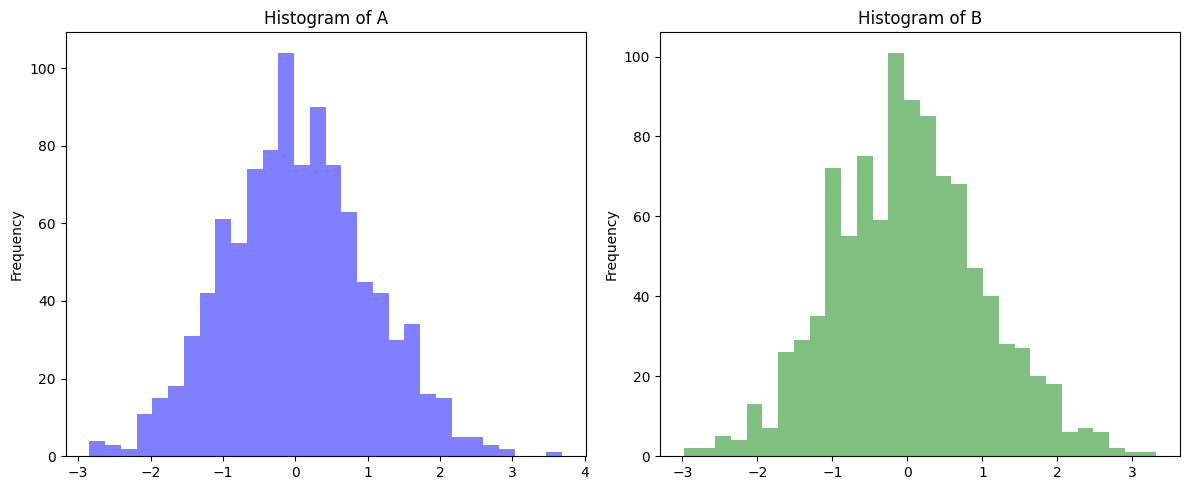

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()



          A         B         C         D         E
0  0.298055  0.497182  0.362903  0.329761  0.146671
1  0.029352  0.738646  0.774938  0.027722  0.879638
2  0.732029  0.123138  0.616746  0.888859  0.372482
3  0.798492  0.099685  0.182749  0.493014  0.004613
4  0.931326  0.087750  0.290505  0.560941  0.195928
5  0.416581  0.700753  0.307745  0.675095  0.201912
6  0.220424  0.636656  0.684984  0.101584  0.430789
7  0.537437  0.240638  0.421671  0.800201  0.413592
8  0.185519  0.558049  0.415022  0.649255  0.993802
9  0.597946  0.085124  0.342525  0.111206  0.058624 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.474716   0.376762   0.439979   0.463764   0.369805
std     0.294371   0.274681   0.190281   0.306743   0.332224
min     0.029352   0.085124   0.182749   0.027722   0.004613
25%     0.239832   0.105548   0.316440   0.165845   0.158986
50%     0.477009   0.368910   0.388963   0.526977   0.287197

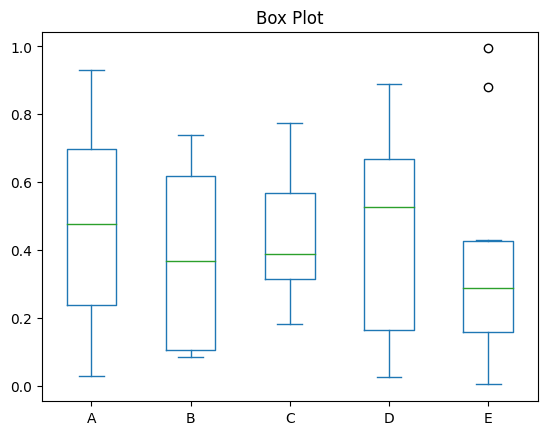

In [53]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
print(df,'\n')
print(df.describe(),'\n')

# 박스 플롯
df.plot.box()
plt.title('Box Plot')
plt.show()

          A         B         C         D
0  0.351047  0.556258  0.790185  0.990736
1  0.476003  0.268569  0.002039  0.319590
2  0.363771  0.528567  0.366488  0.380762
3  0.652526  0.087585  0.426977  0.029636
4  0.538386  0.290220  0.531986  0.643651 



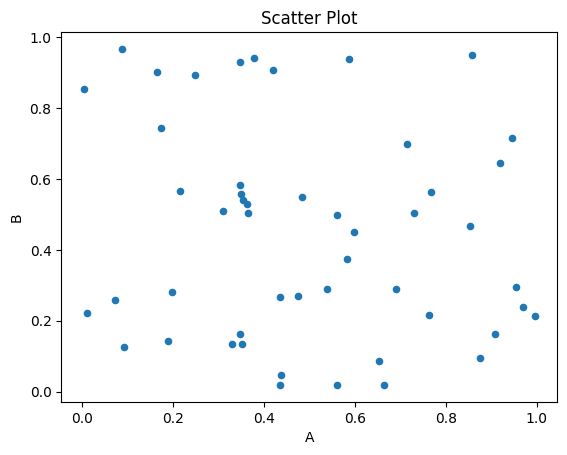

In [56]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['A', 'B', 'C', 'D'])
print(df.head(),'\n')
# 산점도
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

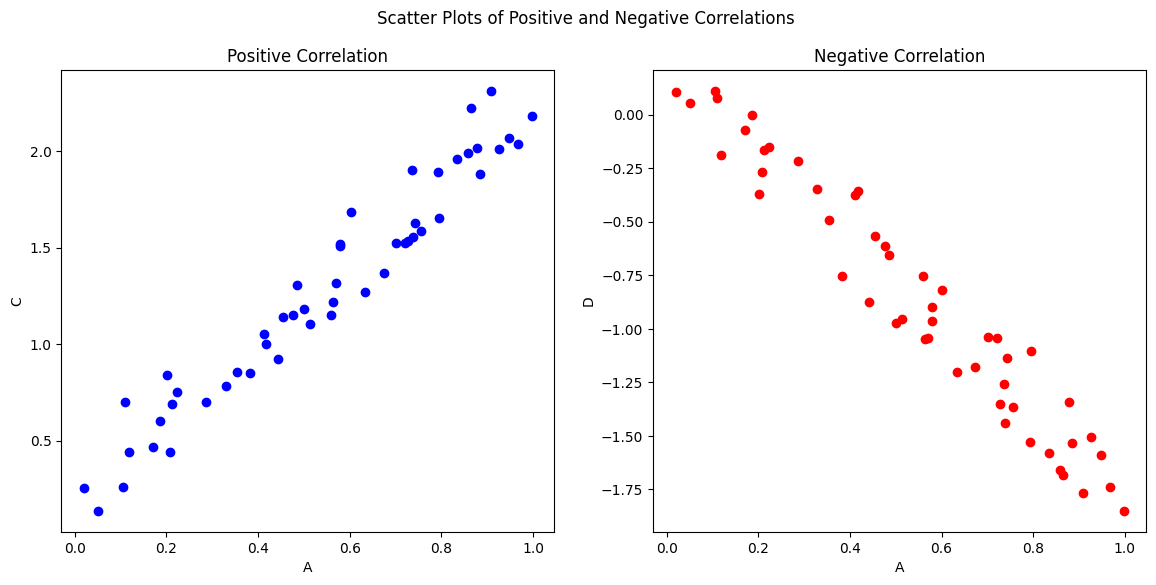

In [57]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['A', 'B', 'C', 'D'])

# 양의 상관관계
df['C'] = df['A'] * 2 + np.random.rand(50) * 0.5

# 음의 상관관계
df['D'] = -df['A'] * 2 + np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'],df['C'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'],df['D'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Plots of Positive and Negative Correlations')
plt.show()

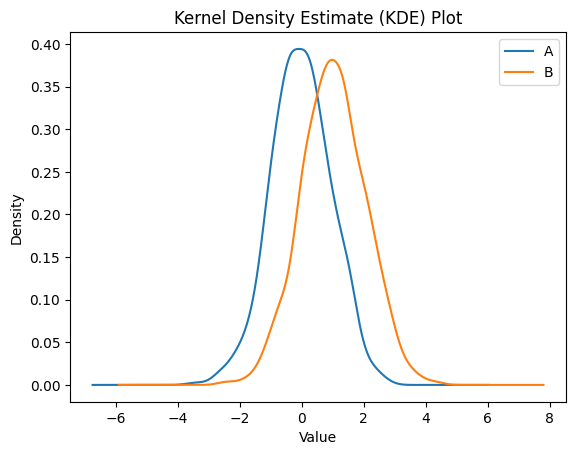

In [58]:
# 커널 밀도 추정(KDE, Kernel Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000) + 1
})

# KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


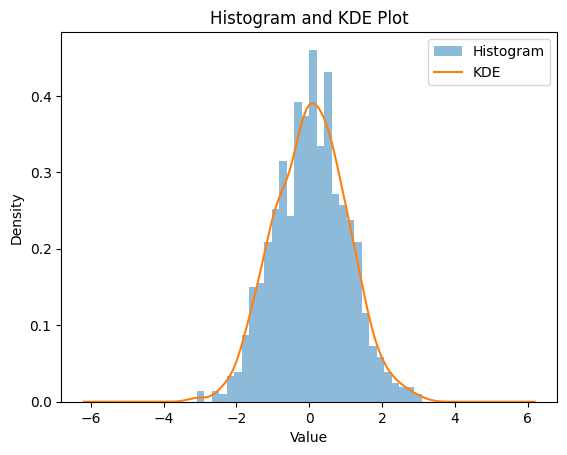

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = pd.Series(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기
ax = data.plot.hist(bins=30, alpha=0.5, density=True, label='Histogram')  # 히스토그램
data.plot.kde(ax=ax, label='KDE')  # KDE 그래프
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
import pandas as pd

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일을 데이터프레임으로 읽기
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 데이터프레임 확인
df.head()


Saving titanic3.csv to titanic3.csv


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요

sex
male      0.190985
female    0.727468
Name: survived, dtype: float64 



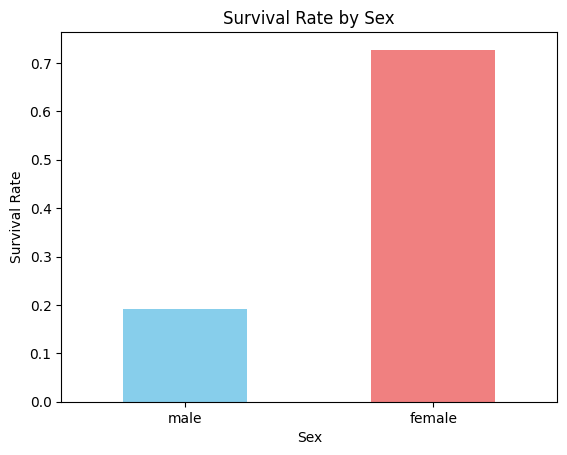

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 성별과 생존율 관계 시각화
survival_by_sex = df.groupby('sex')['survived'].mean().sort_values()
print(survival_by_sex,'\n')

# 시각화
survival_by_sex.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 필요한 열 선택 및 전처리
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[features + ['survived']]

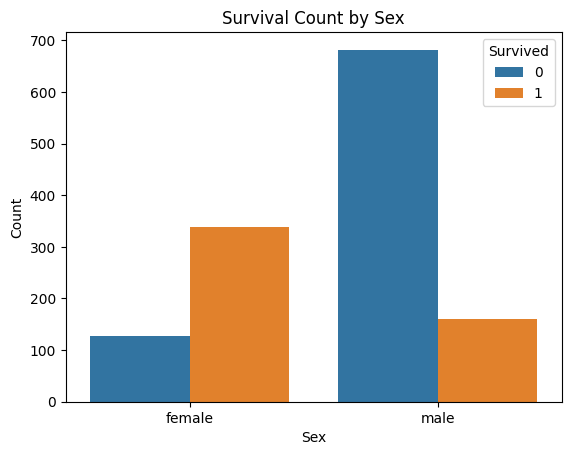

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존,사망)수 관계 시각화
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

pclass
3    0.255289
2    0.429603
1    0.619195
Name: survived, dtype: float64 



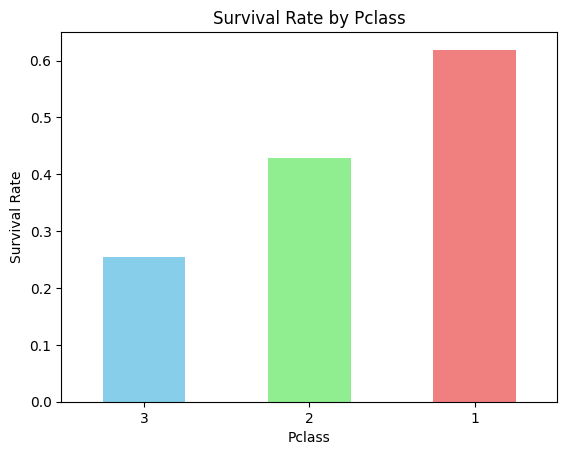

In [65]:
# 승객 등급과 생존율 관계 계산
survival_by_pclass = df.groupby('pclass')['survived'].mean().sort_values()
print(survival_by_pclass,'\n')

# 시각화
survival_by_pclass.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

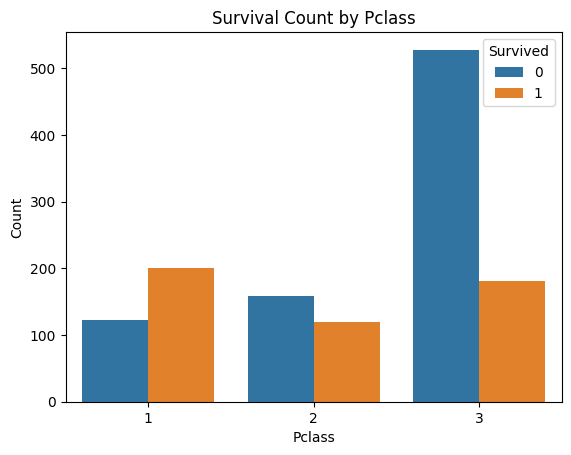

In [66]:
# 승객 등급과 승객(생존, 사망)수 관계 시각화
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

Q. 나이와 생존율 관계를 시각화하여 출력하세요.

age_group
(0, 10]      0.581395
(10, 20]     0.395062
(20, 30]     0.371191
(30, 40]     0.423810
(40, 50]     0.393939
(50, 60]     0.483871
(60, 70]     0.222222
(70, 80]     0.333333
(80, 90]          NaN
(90, 100]         NaN
Name: survived, dtype: float64 



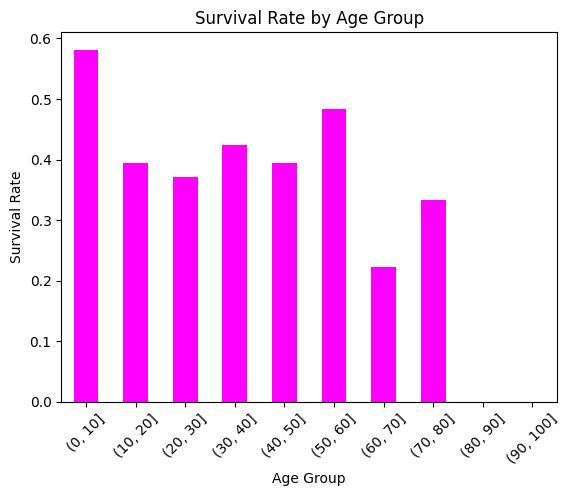

In [72]:
# 나이와 생존율 관계 계산을 위해 나이를 그룹화
# (0,10] : 0 초과 10 이하
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# 나이 그룹별 생존율 계산
survival_by_age_group = df.groupby('age_group')['survived'].mean()
print(survival_by_age_group,'\n')

# 시각화
survival_by_age_group.plot(kind='bar', color='magenta')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

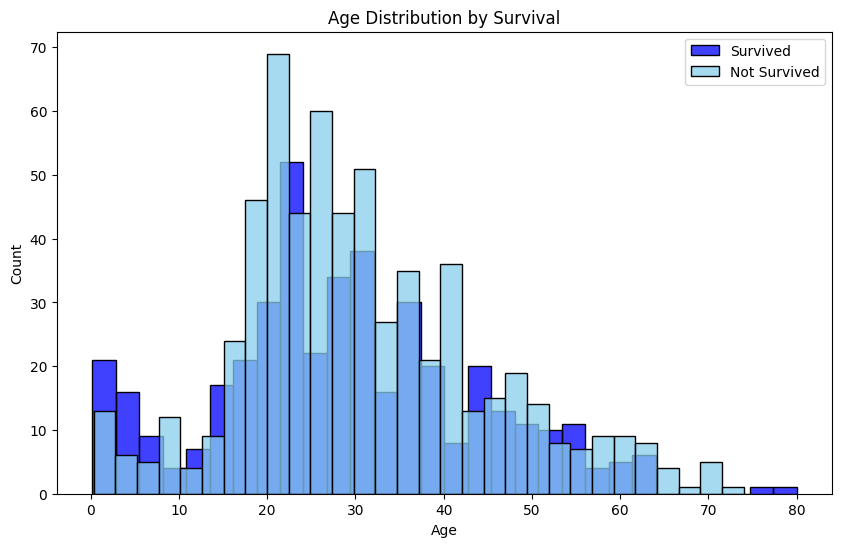

In [74]:
# 나이와 생존,사망자수 관계 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=False, color='blue', label='Survived')
sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=False, color='skyblue', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

fare_group
(0, 50]       0.323501
(50, 100]     0.628205
(100, 150]    0.787879
(150, 200]    0.615385
(200, 250]    0.571429
(250, 300]    0.769231
(300, 350]         NaN
(350, 400]         NaN
(400, 450]         NaN
(450, 500]         NaN
Name: survived, dtype: float64 



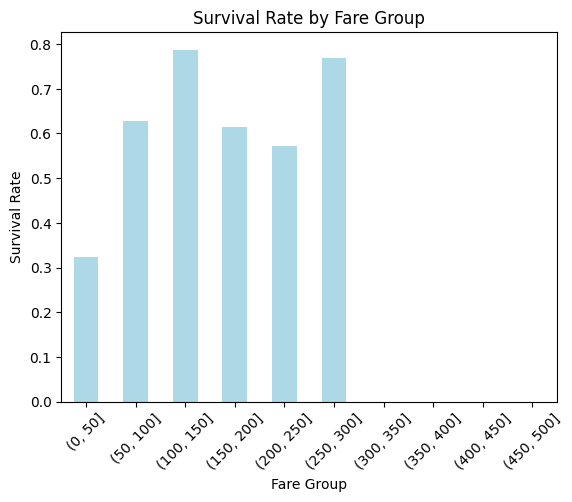

In [80]:
# 요금과 생존율 관계 계산을 위해 요금을 그룹화
df['fare_group'] = pd.cut(df['fare'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

# 요금 그룹별 생존율 계산
survival_by_fare_group = df.groupby('fare_group')['survived'].mean()
print(survival_by_fare_group,'\n')

# 시각화
survival_by_fare_group.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

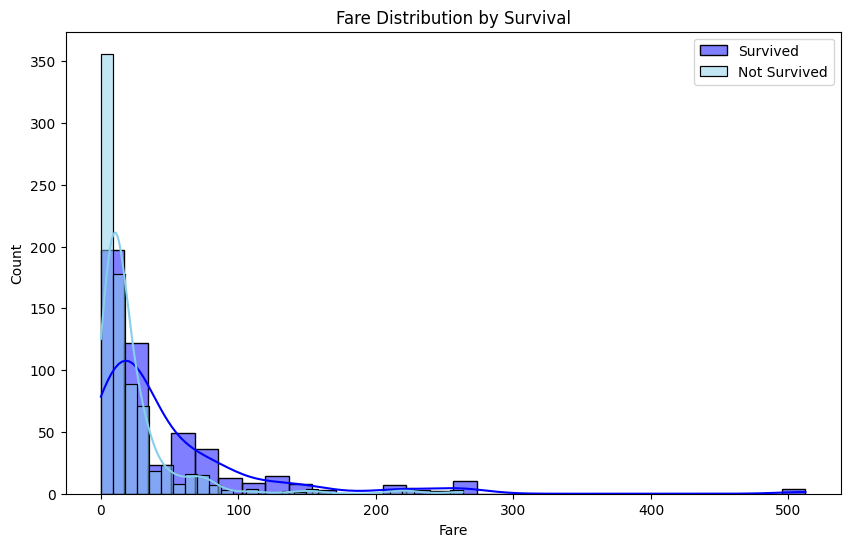

In [82]:
# 요금과 생존,사망자수 관계 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df[df['survived'] == 1]['fare'], bins=30, kde=True, color='blue', label='Survived')
sns.histplot(df[df['survived'] == 0]['fare'], bins=30, kde=True, color='skyblue', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()


Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



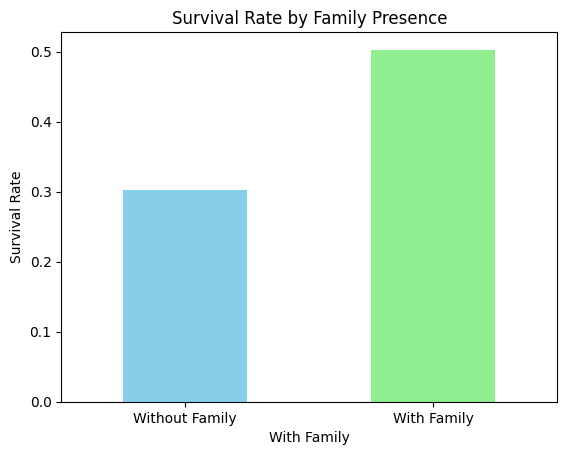

In [83]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

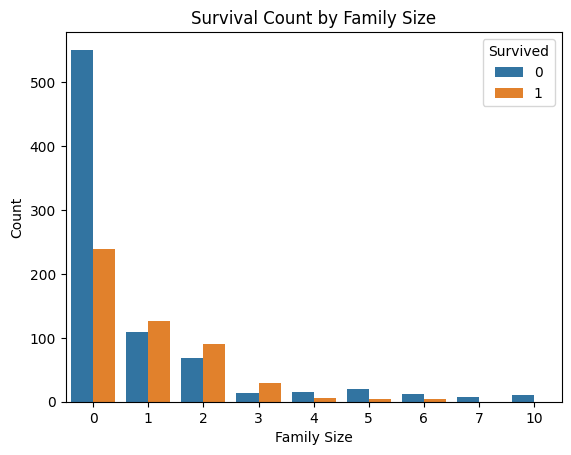

In [85]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()
